In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import linear_model

rcParams.update({'font.size': 18})

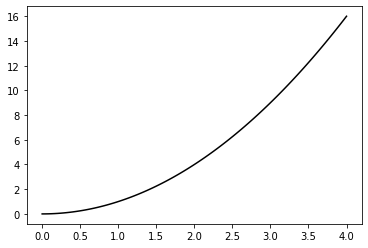

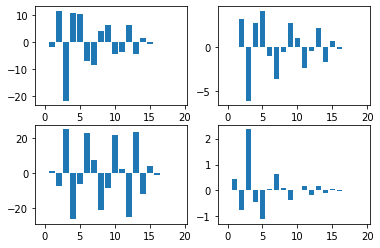

In [8]:
n = 100
L = 4
x = np.linspace(0,L,n)
f = np.power(x,2) # Parabola with 100 data points

M = 20 # Polynomial degree

phi = np.zeros((n,M))
for j in range(M):
    phi[:,j] = np.power(x,j) # Build matrix A
    
plt.figure()
plt.plot(x,f,color='k')
    
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)

for j in range(4):
    fn = np.power(x,2) + 0.1*np.random.randn(*x.shape)
    an = np.linalg.pinv(phi) @ fn # Least-square fit
    fna = phi @ an 
    En = np.linalg.norm(f-fna,ord=2)/np.linalg.norm(f,ord=2)
    axs[j].bar(range(len(an)),an)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.96313364616438, tolerance: 0.23262143211570602
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.980496909240491, tolerance: 0.23009443396543713
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.834149648064171, tolerance: 0.23159754285130368
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.563012266253029, tolerance: 0.23583523131668782
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.761618396081548, tolerance: 0.2308814856199967
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.345718833239838, tolerance: 0.23185210928517164
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.848175641718974, tolerance: 0.2303320965111695
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.747253483442849, tolerance: 0.23192194419778916
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.94594311197503, tolerance: 0.23379791274243827
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.446372135018155, tolerance: 0.2299930878420481
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.0539397163259, tolerance: 0.23509858656967408
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.986888284121775, tolerance: 0.2327807847166748
  positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

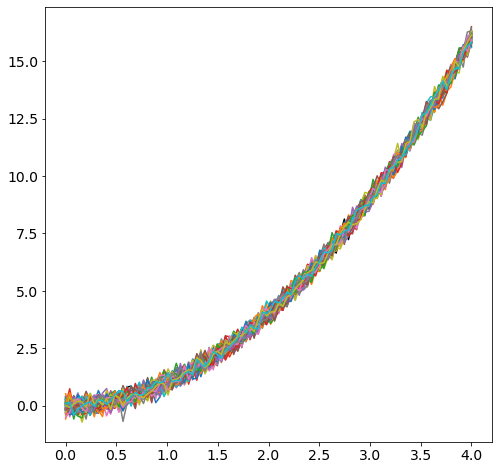

In [109]:
## Different regressions
plt.figure()
plt.plot(x,f,color='k')

lam = 0.1
phi2 = phi[:,1:]
E1 = np.zeros(100)
E2 = np.zeros(100)
E3 = np.zeros(100)
E4 = np.zeros(100)
E5 = np.zeros(100)
E6 = np.zeros(100)

A1 = np.zeros((M,100))
A2 = np.zeros((M,100))
A3 = np.zeros((M,100))
A4 = np.zeros((M,100))
A5 = np.zeros((M,100))
A6 = np.zeros((M,100))

for jj in range(100):
# for jj in range(10):
    f = np.power(x,2)+0.2*np.random.randn(n)
    
    a1 = np.linalg.pinv(phi) @ f
    f1 = phi @ a1
    E1[jj] = np.linalg.norm(f-f1,ord=2)/np.linalg.norm(f,ord=2)
    
    a2 = np.linalg.lstsq(phi,f,rcond=None)[0]
    f2 = phi @ a2
    E2[jj] = np.linalg.norm(f-f2,ord=2)/np.linalg.norm(f,ord=2)
    
    regr3 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr3.fit(phi, f)  
    a3 = regr3.coef_
    f3 = phi @ a3
    E3[jj] = np.linalg.norm(f-f3,ord=2)/np.linalg.norm(f,ord=2)
    
    regr4 = linear_model.ElasticNet(alpha=0.8, copy_X=True, l1_ratio=lam, max_iter=10**5,random_state=0)
    regr4.fit(phi, f)  
    a4 = regr4.coef_
    f4 = phi @ a4
    E4[jj] = np.linalg.norm(f-f4,ord=2)/np.linalg.norm(f,ord=2)
    
    huber = linear_model.HuberRegressor().fit(phi, f) # matlab's robustfit() does not have an exact sklearn analogue
    a5 = huber.coef_
    f5 = phi @ a5
    E5[jj] = np.linalg.norm(f-f5,ord=2)/np.linalg.norm(f,ord=2)

    ridge = linear_model.Ridge(alpha=1.0).fit(phi,f)
    a6 = ridge.coef_
    f6 = phi @ a6
    E6[jj] = np.linalg.norm(f-f6,ord=2)/np.linalg.norm(f,ord=2)

    
    A1[:,jj] = a1
    A2[:,jj] = a2
    A3[:,jj] = a3
    A4[:,jj] = a4
    A5[:,jj] = a5
    A6[:,jj] = a6

    plt.plot(x,f)
    
Err = np.column_stack((E1,E2,E3,E4,E5,E6))
Err2 = np.column_stack((E1,E2,E3,E4,E5))

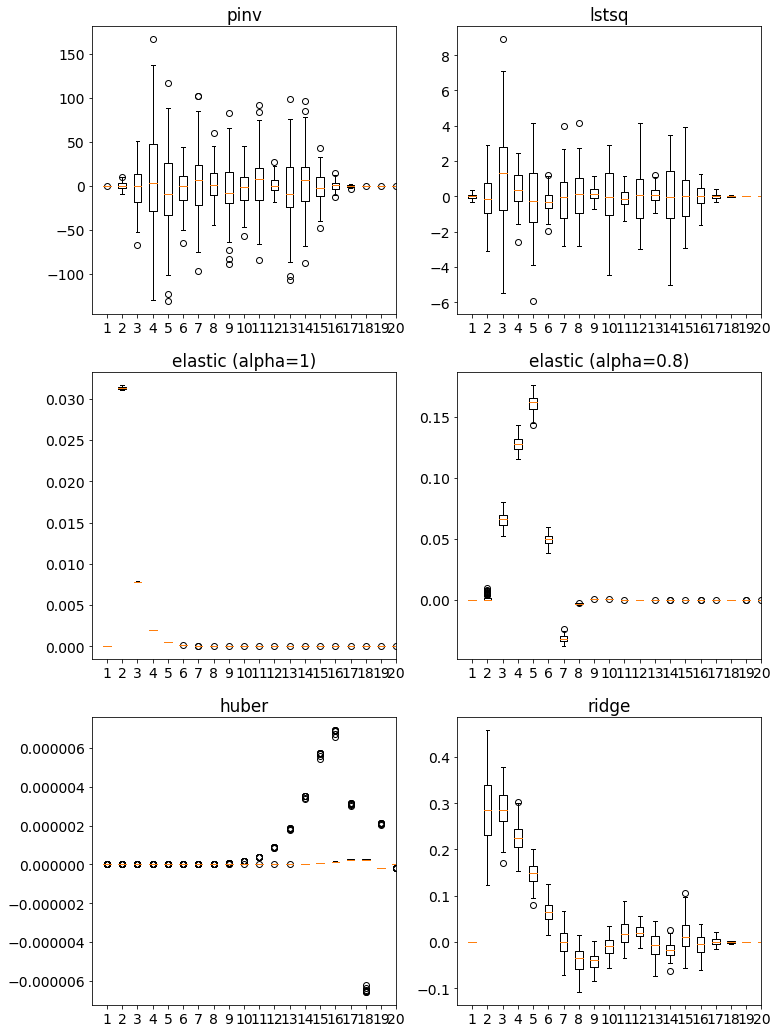

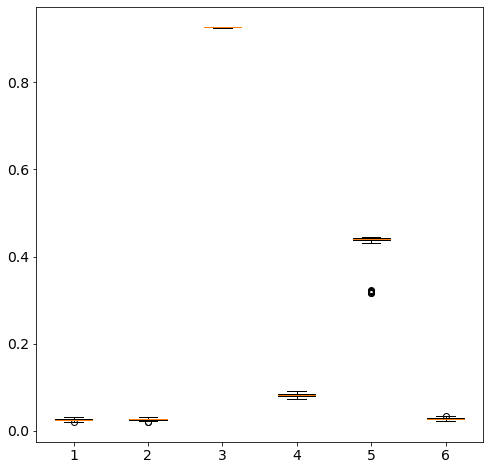

In [111]:
plt.rcParams['figure.figsize'] = [12, 18]
rcParams.update({'font.size': 14})
fig,axs = plt.subplots(3,2)
axs = axs.reshape(-1)

axs[0].boxplot(A1.T)
axs[0].set_title('pinv')
axs[1].boxplot(A2.T)
axs[1].set_title('lstsq')
axs[2].boxplot(A3.T)
axs[2].set_title('elastic (alpha=1)')
axs[3].boxplot(A4.T)
axs[3].set_title('elastic (alpha=0.8)')
axs[4].boxplot(A5.T)
axs[4].set_title('huber')
axs[5].boxplot(A6.T)
axs[5].set_title('ridge')

for ax in axs:
    ax.set_xlim(0,M)
    
plt.rcParams['figure.figsize'] = [8, 8]

plt.figure()
plt.boxplot(Err)

plt.show()

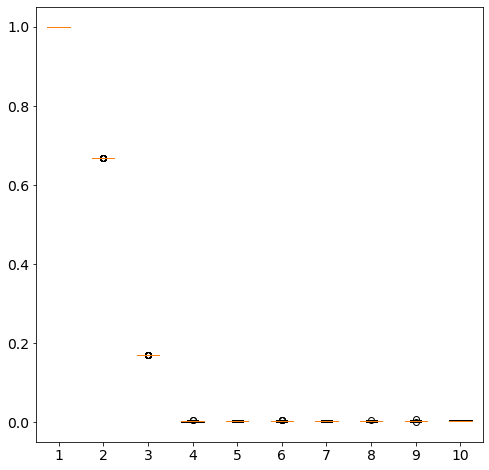

In [112]:
M = 10
En = np.zeros((100,M))
phi = np.zeros((len(x),M))
for jj in range(M):
    for j in range(jj):
        phi[:,j] = np.power(x,j)
    f = np.power(x,2)
    for j in range(100):
        fn = np.power(x,2) + 0.1*np.random.randn(n)
        an = np.linalg.pinv(phi) @ fn
        fna = phi @ an
        En[j,jj] = np.linalg.norm(f-fna,ord=2)/np.linalg.norm(f,ord=2)
        
plt.boxplot(En)

plt.show()